# Libraries

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data exploration

In [2]:
cookies = pd.read_csv('../Data/cookies.csv')

In [3]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,butter type,weight,diameter,mixins,crunch factor,aesthetic appeal
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,melted,15.2,7,raisins,1.30,3
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,melted,12.4,7,raisins,1.71,3
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,melted,9.4,7,"nuts, chocolate",1.78,3
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,melted,12.2,7,chocolate,1.59,3
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,cubed,19.8,7,"nuts, oats, chocolate",1.30,3


In [4]:
cookies['quality'].value_counts() # #3-11

8     1780
7     1323
9      707
6      617
5      577
10     137
4       44
3        8
11       5
Name: quality, dtype: int64

In [5]:
cookies.isnull().sum()

sugar to flour ratio     0
sugar index              5
bake temp                0
chill time               0
calories                 0
density                  0
pH                       0
grams baking soda        0
bake time               10
quality                  0
butter type              0
weight                   0
diameter                 0
mixins                   2
crunch factor            0
aesthetic appeal         0
dtype: int64

In [6]:
cookies.dropna(inplace=True)

In [7]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5181 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5181 non-null   float64
 1   sugar index           5181 non-null   float64
 2   bake temp             5181 non-null   int64  
 3   chill time            5181 non-null   float64
 4   calories              5181 non-null   float64
 5   density               5181 non-null   float64
 6   pH                    5181 non-null   float64
 7   grams baking soda     5181 non-null   float64
 8   bake time             5181 non-null   float64
 9   quality               5181 non-null   int64  
 10  butter type           5181 non-null   object 
 11  weight                5181 non-null   float64
 12  diameter              5181 non-null   int64  
 13  mixins                5181 non-null   object 
 14  crunch factor         5181 non-null   float64
 15  aesthetic appeal     

In [8]:
cookies.describe()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,weight,diameter,crunch factor,aesthetic appeal
count,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.000000,5181.0,5181.000000,5181.000000
mean,0.318215,5.401718,559.496236,30.383903,115.022679,0.995435,8.221892,0.531002,10.495561,7.325613,14.383922,7.0,1.499025,3.000579
std,0.149769,4.669065,353.265184,17.249170,56.468852,0.055723,0.283618,0.151002,1.194958,1.302336,3.027030,0.0,0.289244,0.024059
min,0.000000,0.600000,90.000000,0.000000,-99.000000,0.987110,7.720000,0.220000,8.000000,3.000000,-99.000000,7.0,1.000000,3.000000
25%,0.240000,1.800000,380.000000,17.000000,76.000000,0.992300,8.110000,0.430000,9.500000,7.000000,12.800000,7.0,1.250000,3.000000
50%,0.310000,3.000000,470.000000,29.000000,118.000000,0.994800,8.210000,0.510000,10.300000,8.000000,14.000000,7.0,1.500000,3.000000
75%,0.390000,8.000000,640.000000,41.000000,155.000000,0.996910,8.320000,0.600000,11.300000,8.000000,15.400000,7.0,1.750000,3.000000
max,3.000000,31.600000,6110.000000,146.500000,366.500000,5.000000,25.000000,2.000000,14.900000,11.000000,31.800000,7.0,2.000000,4.000000


## Correlations

In [9]:
X = cookies.drop(columns = 'quality')
y = cookies['quality']

In [10]:
X.corrwith(y)

sugar to flour ratio    0.179929
sugar index             0.219959
bake temp              -0.470895
chill time              0.364925
calories                0.440080
density                -0.017523
pH                     -0.113725
grams baking soda      -0.306251
bake time               0.315445
weight                 -0.328534
diameter                     NaN
crunch factor           0.008346
aesthetic appeal        0.000143
dtype: float64

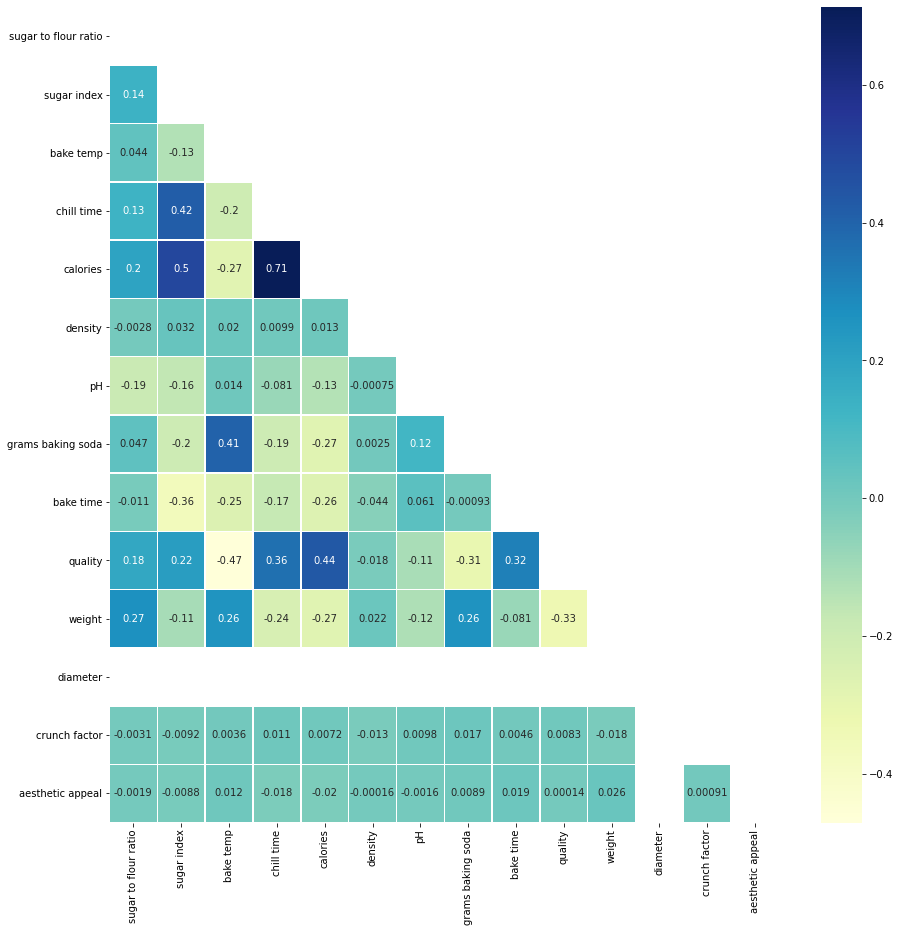

In [11]:
heatmap = cookies.select_dtypes(['int64', 'float64'])

c = cookies.corr()
fig_dims = (15, 15)
mask = np.triu(np.ones_like(c, dtype=bool))
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(c, annot=True,ax = ax, mask=mask,cmap="YlGnBu", linewidths=.5)
plt.show()

In [12]:
cookies.drop(['density', 'crunch factor', 'aesthetic appeal', 'diameter'], axis=1, inplace=True)

# Dropping Outliers

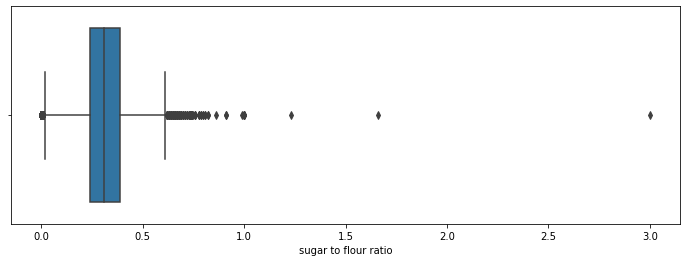

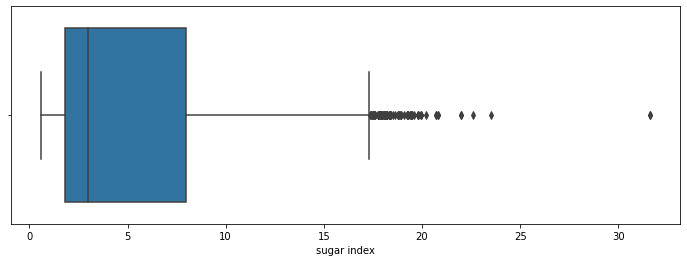

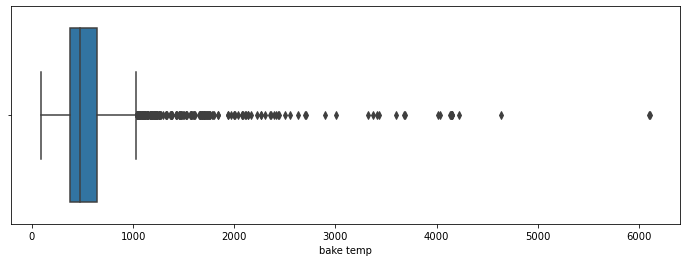

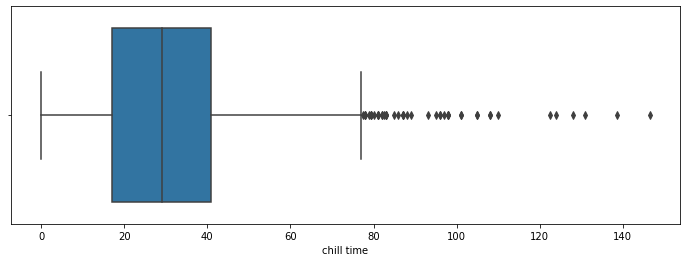

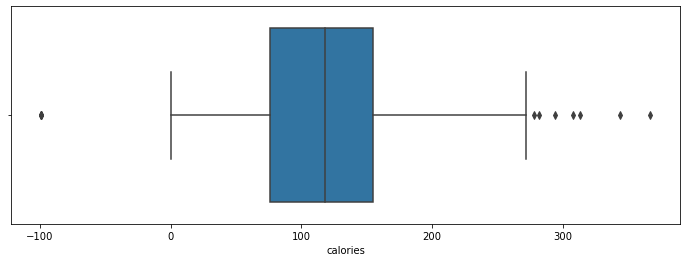

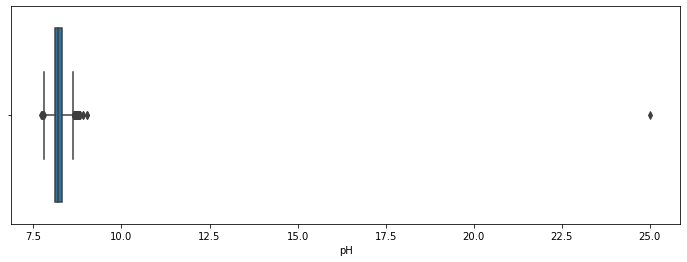

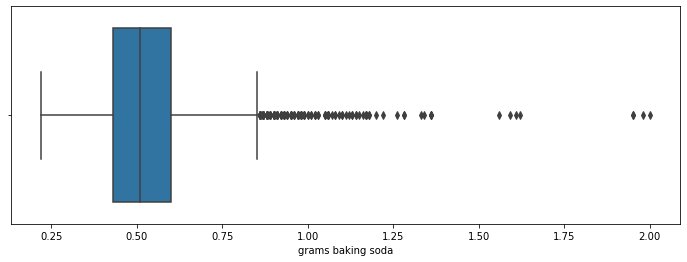

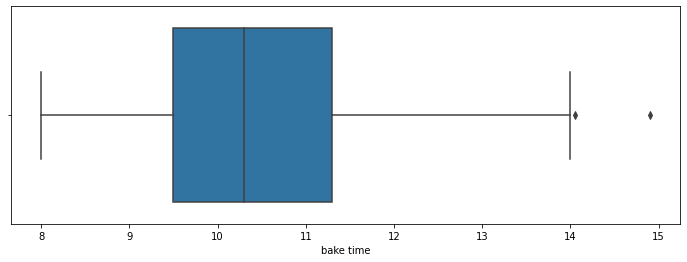

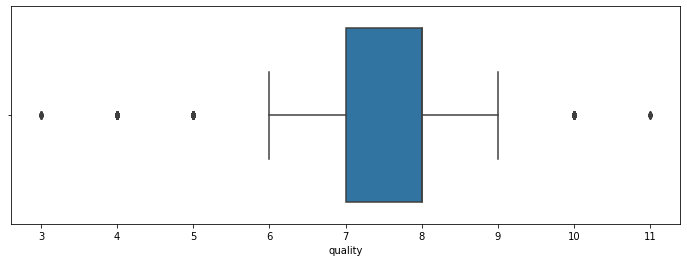

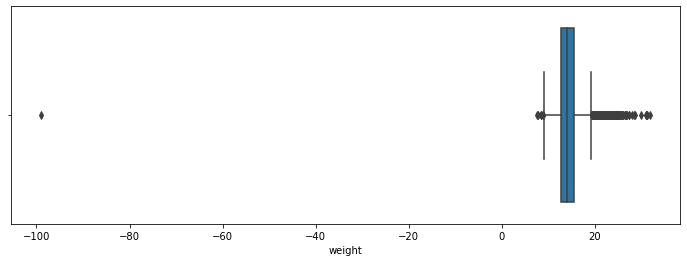

In [13]:
boxplots = cookies.select_dtypes(['int64', 'float64'])

column_list = boxplots.columns.tolist()

for i in column_list:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=boxplots[i])

In [14]:
def drop_outliers(df, column_name):
    iqr = 1.5 * (np.percentile(df[column_name], 75) - np.percentile(df[column_name], 25))
    df.drop(df[df[column_name] > (iqr + np.percentile(df[column_name], 75))].index, inplace=True)
    df.drop(df[df[column_name] < (np.percentile(df[column_name], 25) - iqr)].index, inplace=True)

In [15]:
for item in column_list:
    drop_outliers(cookies, item)

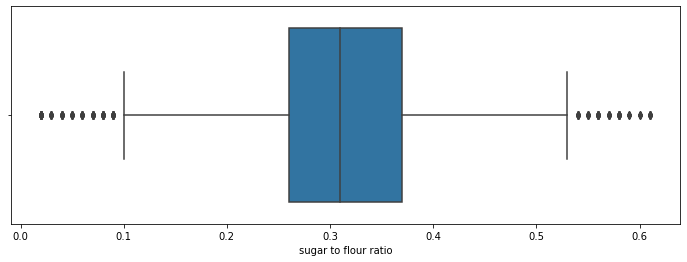

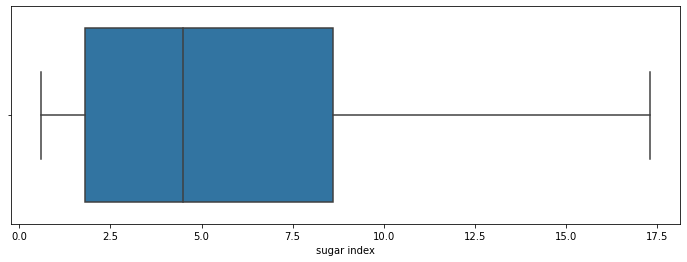

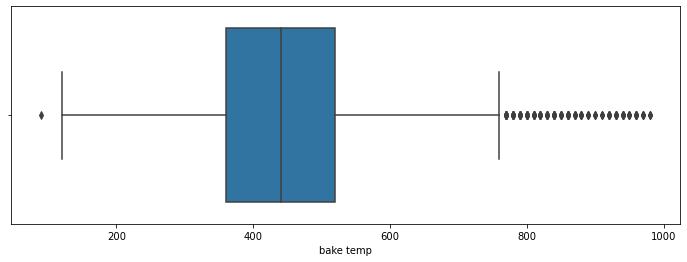

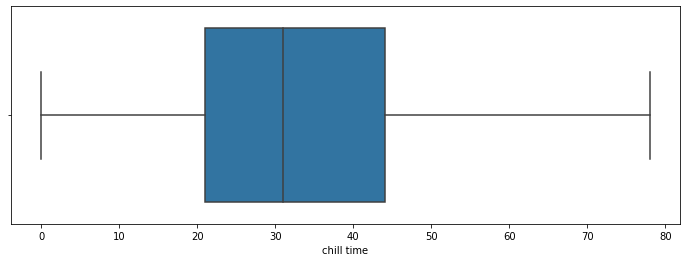

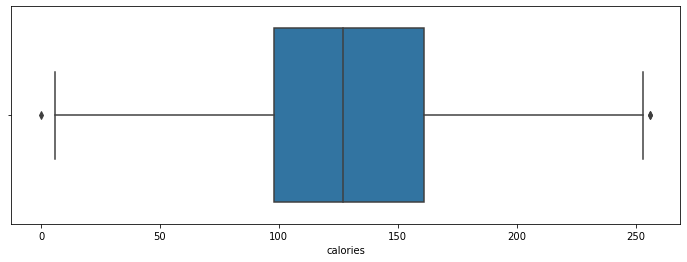

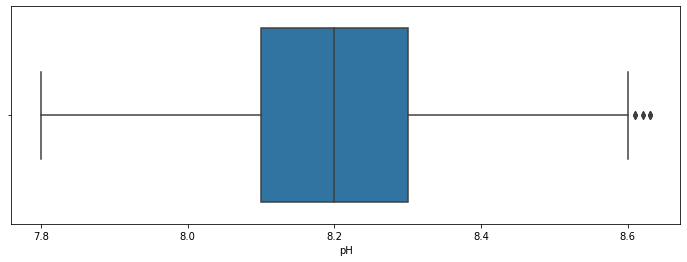

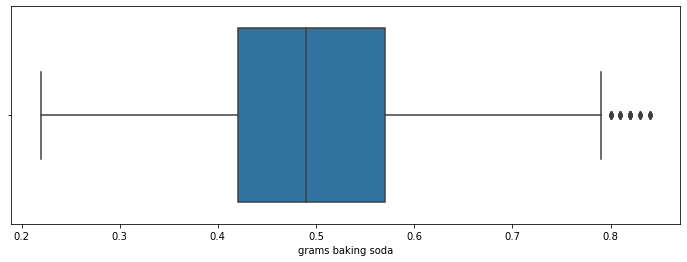

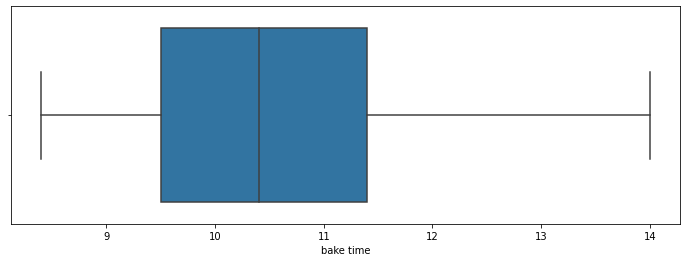

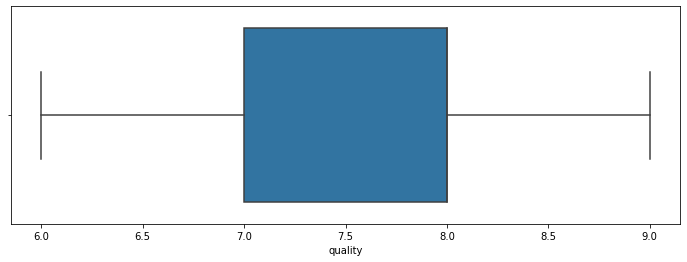

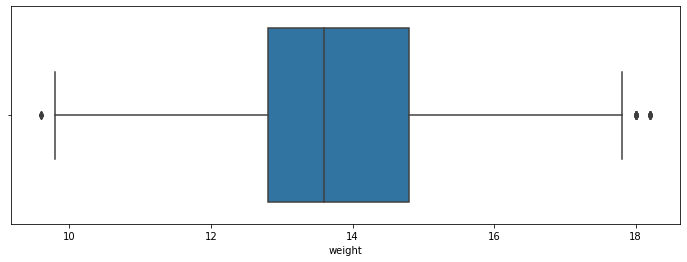

In [16]:
boxplots = cookies.select_dtypes(['int64', 'float64'])

for i in column_list:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=boxplots[i])

## Get dummies

In [17]:
cookies['butter type'].value_counts() #get dummies (melted 1/ cubes 0)

melted    3320
cubed      319
Name: butter type, dtype: int64

In [18]:
cookies['butter type'] = cookies['butter type'].replace('melted', 1).replace('cubed', 0)

In [19]:
cookies['mixins'].value_counts() # 2 ways: 1) Others 2) all

chocolate                   1570
raisins                      898
chocolate, oats              645
nuts, chocolate              284
nuts,raisins                 126
nuts, oats, chocolate         72
nuts, oats                    20
chocolate, peanut butter      15
oats                           4
peanut butter                  3
raisins, oats                  2
Name: mixins, dtype: int64

In [20]:
mixins_list = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']

In [21]:
for x in mixins_list:
    cookies[x] = 0
    cookies[x] = cookies['mixins'].str.contains(x).astype(int)

In [22]:
cookies.drop('mixins', axis=1, inplace=True)

In [23]:
cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,quality,butter type,weight,chocolate,raisins,oats,nuts,peanut butter
0,0.25,9.5,300,15.0,136.0,8.10,0.44,12.1,8,1,15.2,0,1,0,0,0
1,0.23,3.3,520,34.0,113.0,8.16,0.48,8.4,7,1,12.4,0,1,0,0,0
3,0.18,10.5,490,41.0,124.0,8.14,0.35,10.5,7,1,12.2,1,0,0,0,0
6,0.39,2.3,410,31.0,102.0,8.22,0.58,10.9,9,1,13.2,1,0,0,0,0
7,0.39,2.6,440,30.0,180.0,8.46,0.44,10.8,9,1,15.2,1,0,0,0,0


In [24]:
# drop: density, crunch, aesthetic, diameter

# Save datafile

In [25]:
cookies.to_csv('../Data/cookies_clean.csv')

In [26]:
cookies

,sugar to flour ratio,sugar index,bake temp,chill time,calories,pH,grams baking soda,bake time,quality,butter type,weight,chocolate,raisins,oats,nuts,peanut butter
0,0.25,9.5,300,15.0,136.0,8.10,0.44,12.1,8,1,15.2,0,1,0,0,0
1,0.23,3.3,520,34.0,113.0,8.16,0.48,8.4,7,1,12.4,0,1,0,0,0
3,0.18,10.5,490,41.0,124.0,8.14,0.35,10.5,7,1,12.2,1,0,0,0,0
6,0.39,2.3,410,31.0,102.0,8.22,0.58,10.9,9,1,13.2,1,0,0,0,0
7,0.39,2.6,440,30.0,180.0,8.46,0.44,10.8,9,1,15.2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,0.32,2.1,640,4.0,15.0,8.30,0.80,11.2,6,0,18.2,0,1,0,0,0
5190,0.24,1.8,250,32.0,102.0,8.34,0.59,12.8,8,1,14.2,0,1,0,0,0
5192,0.23,7.9,330,22.0,130.0,8.38,0.59,10.9,8,1,11.8,1,0,0,0,0
5194,0.16,1.5,490,10.0,97.0,8.48,0.44,10.7,8,1,10.0,0,1,0,0,0
